In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn.apionly as sns
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} # default is tight 


from matplotlib import gridspec
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session
sys.path.append('..')
import functions.trig as trig
from figure_settings import icra
icra = icra()

sns.set(context='talk', 
        style='ticks', 
        palette='deep', 
        font='Computer Modern Roman', 
        font_scale=1.0, #actually changes font size
        color_codes=True, 
        rc={'text.usetex' : True,
            'font.family' : 'serif',
            'backend'     : 'PS',# backend changes which image types can be saved
            'font.serif'  : 'Computer Modern Roman'}
       )


default_colors = sns.color_palette("deep")[:]
blue, green, red, purple, yellow, cyan = default_colors
grey = sns.xkcd_palette(["greyish"])[0]



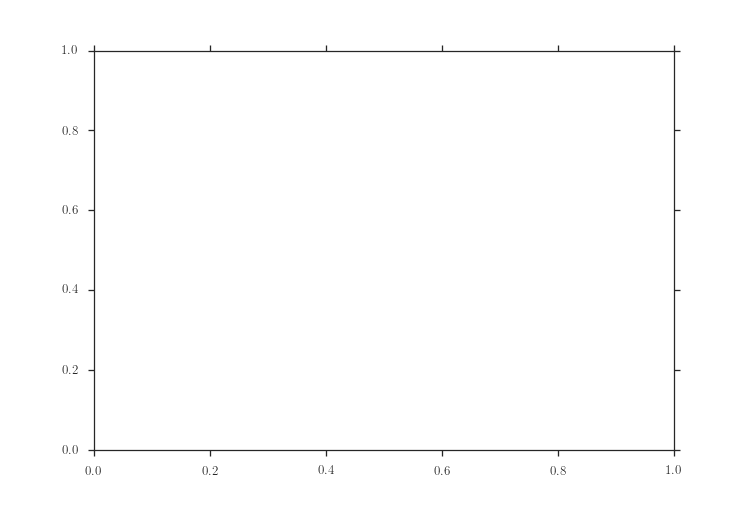

In [2]:
from lung_plots import plot_lung
# mlc = plot_lung('robot_data/lung_runs/history_mlc_sparse_traj.p')
# mbc = plot_lung('robot_data/lung_runs/history_mbc_sparse_traj.p')
# abc = plot_lung('robot_data/lung_runs/history_abc_sparse_traj.p')

pl = plot_lung(['robot_data/lung_runs/history_abc_sparse_traj.p',
                'robot_data/lung_runs/history_mlc_sparse_traj.p',
                'robot_data/lung_runs/history_mbc_sparse_traj.p'], 
              [r'$\alpha \beta \gamma$', 'MLC', 'Model'])


In [3]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=False)
# abc.plot_lung_cloud(1, 0, ax = ax1, skip_n = 1, alpha = 0.002)
# abc.plot_lung_cloud(2, 0, ax = ax2, skip_n = 1, alpha = 0.002)


In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


/Users/jakesganga/anaconda/lib/python3.5/site-packages/matplotlib/artist.py:788: UserWarning: Rasterization of 'Axes(0.353333,0.22;0.546667x0.58)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


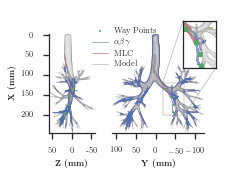

In [5]:
fig = pl.make_lung_figure( 
                         fig_width  = icra.col_width,
                         fig_height = icra.golden_height + 0.2,
                         subplot_left  = 0.08,  # the left side of the subplots of the figure
                         subplot_right = 0.9,    # the right side of the subplots of the figure
                         subplot_bottom = 0.22,   # the bottom of the subplots of the figure
                         subplot_top = 0.8,      # the top of the subplots of the figure
                         subplot_wspace = -.5,   # the amount of width reserved for blank space between subplots
                         subplot_hspace = -.25,   # the amount of height reserved for white space between subplots
                         skip_n = 1, # skip n - 1 points when plotting lung dots
                         lung_color = blue,
                         lung_alpha = 0.004,
                         lung_markersize = 2,
                         rasterize_lung = True, # allows pdfs to not save every single point 
                         rasterize_order = 0, # no idea what this does
                         run_colors = [blue, red, grey],
                         run_alphas = [0.7, 0.7, 0.7],
                         linewidth  = 0.75,
                         wp_color   = green,
                         wp_alpha   = 0.8,
                         wp_markersize = 2,
                         zoom_factor = 1.5,
                         bbox_tuple = (0.7, 0.56),
                         zoom_limits = (-73, -18, 120, 200),
                         legend_bbox = [-3,1],
                         )

In [6]:
pl.savefig(file_name = 'test', file_format = 'pdf', dpi = 1200)

In [7]:
pl.lung.shape

(251998, 3)

In [8]:
lung = pl.lung[pl.lung[:,1] < 0]
lung.shape

(121257, 3)

In [9]:
pl.indeces

array([[2905, 3382, 6993, 11434, 13893, 15657, 18791, 19095],
       [2829, 3074, 6730, 13276, 15843, 16680],
       [2835, 3165, 6682, 11383, 18738]], dtype=object)

In [10]:
len(pl.x_sensed[1])

16680